# Proyek Analisis Data: Nama dataset
- Nama: Muhamad Insan Rahmatuloh
- Email: muhamad.insan.r@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- dimana saja kota tempat tinggal customer dan kota mana yang paling banyak
- dari wilayah tsb dimana order paling banyak
- produk apa saja yang paling banyak diorder
- apa saja produk dengan skor review yang baik
- bagaimana presentase status order
- produk yang paling mahal 
- bagaimana analisis RFMnya
- bagaimana geoanalisis antara order, customer dan seller

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data 

In [2]:
customers = pd.read_csv('data/E-Commerce Public Dataset/customers_dataset.csv')
geolocation = gpd.read_file('data/E-Commerce Public Dataset/geolocation_dataset.csv')
# geo_location = gpd.GeoDataFrame(geolocation, geometry=gpd.points_from_xy(geolocation['geolocation_lng'], geolocation['geolocation_lat']))
# geo_location.crs = {'init':'epsg:4326'}
order_items = pd.read_csv('data/E-Commerce Public Dataset/order_items_dataset.csv')
order_payments = pd.read_csv('data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/E-Commerce Public Dataset/order_reviews_dataset.csv')
orders = pd.read_csv('data/E-Commerce Public Dataset/orders_dataset.csv')
product_cat_name = pd.read_csv('data/E-Commerce Public Dataset/product_category_name_translation.csv')
products = pd.read_csv('data/E-Commerce Public Dataset/products_dataset.csv')
sellers = pd.read_csv('data/E-Commerce Public Dataset/sellers_dataset.csv')


### Assessing Data

#### Customers

In [3]:
customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
33685,8b395f74a33054bc1e054c5b9348df51,8b843efe35f8a54b66f7abf3e460e84d,14750,pitangueiras,SP
29286,1b85ef7130ec3eedf81c37b98cfd9b40,4ffc8b4c0b31be69c7faa74d49b76858,30770,belo horizonte,MG
3472,ab7c123c62153f2fd23fd5d2a89cf967,854db8619db888f8301fe3aac4e3a7e3,33030,santa luzia,MG
84255,442a8d84f052ca755b763932022a8bdf,b179fc545496f717862f81b86b2525fa,7081,guarulhos,SP
18464,00ca4dec2a491c4c1a9081a3c5a1e8b1,a296cb7b16ea56f1ffe6c09fa429ede2,72920,aguas lindas de goias,GO
43627,22a330de6f63a8d1631ce94b17a4fafe,d2dbd5be475f37efe006c1de35e5db92,29360,castelo,ES
61290,dcf31fde264db06111ff12f30253f3aa,56c73ec350b2f12203423892fdc32d14,13635,pirassununga,SP
67431,d8377b6daad072b33c9ceb27d1331c56,141f1b86e17cb7921456186ece44c70e,13972,itapira,SP
66967,99a5a40178ddd41b526250426a60f363,8816ea7c1592bcab312eae9352996067,38060,uberaba,MG
71475,9c9383c705961b79ab63c2626c0ee484,8a7432d16aec9c2e4e40cdcbca613710,14405,franca,SP


In [4]:
customers.shape

(99441, 5)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Geolocation

In [6]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
290013,13069,-22.83980681848347,-47.153912537191985,campinas,SP,None
977904,96170,-31.364009273801184,-51.98014679238661,sao lourenco do sul,RS,None
433506,21746,-22.88165100360668,-43.40406456994057,rio de janeiro,RJ,None
579957,33600,-19.56724090895775,-44.038438179275936,pedro leopoldo,MG,None
937330,89887,-27.07645513819596,-53.159268080786326,palmitos,SC,None


In [7]:
geolocation.shape

(1000163, 6)

In [8]:
geolocation.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   geolocation_zip_code_prefix  1000163 non-null  object  
 1   geolocation_lat              1000163 non-null  object  
 2   geolocation_lng              1000163 non-null  object  
 3   geolocation_city             1000163 non-null  object  
 4   geolocation_state            1000163 non-null  object  
 5   geometry                     0 non-null        geometry
dtypes: geometry(1), object(5)
memory usage: 45.8+ MB


In [9]:
geolocation.geolocation_state.value_counts()

geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64

#### Order Items

In [10]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3436,07c09839b4951ac37863cf9f0f79dedf,1,5be51b87d3f543e942bb8299c5bd4423,6b243f80ed07b10f0e8aa0f21a205f3c,2018-05-14 04:32:20,54.90,15.26
50369,7277412b4dabb3b15f3511cc78e81125,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-30 02:28:34,69.90,12.43
47972,6d08b9609c4e0cb107497f8307539077,1,a59fb60fddcc72a9878b7ed5cb69d8e4,7040e82f899a04d1b434b795a43b4617,2018-05-17 22:10:23,14.90,15.23
78439,b275756d48e9c633331d56a9caedf3ab,1,21b8d4953c15b92f2f965c89dc35f5ad,c714262700f93defc16bf17a51a4cb23,2018-05-21 01:16:14,79.99,27.00
32442,498964d3c3eddfc0d670e6be2ea2d5b2,1,3fbc0ef745950c7932d5f2a446189725,06a2c3af7b3aee5d69171b0e14f0ee87,2018-05-16 11:55:21,64.99,13.02


In [11]:
order_items.shape

(112650, 7)

In [12]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<Axes: ylabel='Count'>

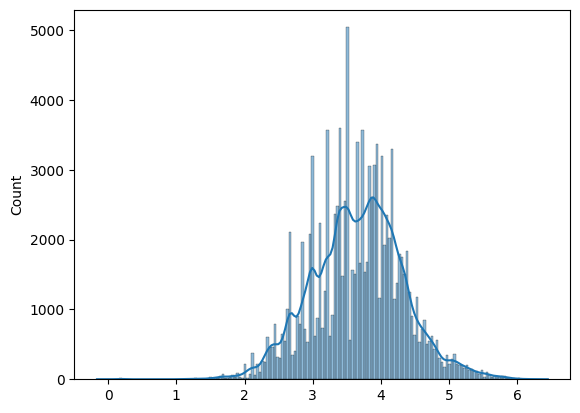

In [14]:
normal_price = stats.boxcox(order_items.price)
sns.histplot(normal_price[0],  kde=True)

#### Order Payments

In [15]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
79865,d9f44a4c9cc80a15b120c0d93b195105,1,credit_card,3,144.21
92789,88ce73cc24548143016810f81a9e53d4,1,credit_card,10,2026.54
69465,31eb0eeda57ce4e970ba7b68d98ece39,1,credit_card,3,106.87
27866,366b94daa22781675a0ffffbcbd517a9,1,credit_card,4,296.28
8003,a9b67aa415d798b812b40a140b942486,2,voucher,1,100.00


In [16]:
order_payments.shape

(103886, 5)

In [17]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Orders Reviews

In [19]:
order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4892,c4a038d20fb356e5e73266e7a87176d5,260da592a3c3072f2c3b9ddc840f8a63,5,NaN,NaN,2017-05-06 00:00:00,2017-05-09 03:38:17
19673,7ba96f95841f5317463f8a4bba91a879,9695692d040abab63df40b68c2905278,2,Demora na entrega,Demora na entrega,2018-05-02 00:00:00,2018-05-04 10:06:06
28864,08c1f078dbcffa9b6ef86ee298dd9d58,49e548b7ec1f515816b62230c96e8f74,4,NaN,NaN,2017-12-09 00:00:00,2017-12-12 04:14:01
11995,c5ddedbec432bbd43f61de785a4b3732,f7b6b85f6fd2cf9aac15731dca998844,4,NaN,NaN,2017-04-05 00:00:00,2017-04-07 21:03:09
56486,c6d31c1c2a718e630a32ee931962aa06,5d84402a7baf6ad1743c1b3ad713a615,3,NaN,NaN,2018-03-08 00:00:00,2018-03-12 12:00:02


In [20]:
order_reviews.shape

(99224, 7)

In [21]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Orders

In [23]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
48702,372daad5a03ca30d47a650aa8b0194e3,18318296c91a6f9911c3aedaee70d707,delivered,2018-03-09 09:49:25,2018-03-09 10:55:23,2018-03-09 22:06:43,2018-03-10 13:21:23,2018-03-21 00:00:00
20755,e6af93ea6ff2947b8760af3dc581f50b,ad9b81cad36cbef93c59cad18606eb37,delivered,2018-05-12 00:20:18,2018-05-12 00:32:04,2018-05-15 08:22:00,2018-06-08 20:15:40,2018-06-04 00:00:00
39271,7588fbb6c9001d45b0f2bafb4be7ef56,a1c991feff10a10e9c9e4d0bad6fe1e9,delivered,2017-10-15 17:15:38,2017-10-15 17:56:25,2017-10-18 16:22:43,2017-10-25 22:02:56,2017-11-01 00:00:00
27950,9eba5a32e40d897f480d2404946b99e1,dc076f27547879d56468224b3055c89c,delivered,2018-01-11 18:22:07,2018-01-11 18:29:31,2018-01-13 02:45:08,2018-01-17 16:38:52,2018-02-08 00:00:00
78024,4de2ebda8d694076106f0a5a3ebaab1b,25b1a4dce6e22c03b3f25ea737690e7f,delivered,2017-11-30 08:33:11,2017-11-30 08:53:15,2017-11-30 19:56:10,2017-12-11 11:51:37,2017-12-28 00:00:00


In [24]:
orders.shape

(99441, 8)

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
cols = ['order_purchase_timestamp','order_delivered_carrier_date','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']

for c in cols:
    orders[c] = pd.to_datetime(orders[c])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [27]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Product Category Name Translation

In [28]:
product_cat_name.sample(5)

,product_category_name,product_category_name_english
27,construcao_ferramentas_jardim,costruction_tools_garden
45,alimentos,food
25,construcao_ferramentas_construcao,construction_tools_construction
60,la_cuisine,la_cuisine
67,artes_e_artesanato,arts_and_craftmanship


In [29]:
product_cat_name.shape

(71, 2)

In [30]:
product_cat_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Products

In [31]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31723,8365b258a7ca21a31b8c972495efd2f7,construcao_ferramentas_iluminacao,58.0,1892.0,1.0,4100.0,36.0,23.0,11.0
21340,df19ace5e7649826fec2d69991a7996b,moveis_decoracao,58.0,1750.0,3.0,2550.0,105.0,3.0,70.0
16723,a7bcd880d9580e8b2ab78868836ceb4e,informatica_acessorios,41.0,570.0,1.0,400.0,16.0,6.0,12.0
13335,406e74c47b79bafda070b3b2d20ddf01,beleza_saude,34.0,933.0,3.0,745.0,27.0,12.0,16.0
20745,1d828db422e61ea21702baf9eda8732d,telefonia_fixa,49.0,210.0,3.0,100.0,16.0,4.0,13.0


In [32]:
products.shape

(32951, 9)

In [33]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
products[products.product_id == '1fbeaaa01377d3f600de52f455ef578c']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11975,1fbeaaa01377d3f600de52f455ef578c,cama_mesa_banho,55.0,664.0,1.0,2800.0,44.0,10.0,34.0


#### Sellers

In [37]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
201,8132b9bd16876e1b0f8808d43825dd48,88058,florianopolis,SC
2817,f09b760d23495ac9a7e00d29b769007c,15802,catanduva,SP
2079,00d8b143d12632bad99c0ad66ad52825,30170,belo horizonte,MG
973,6e13dd869aa7185f601c941423abcc8f,5311,sao paulo,SP
124,75745ef7bc7d4f3ea3380f6f5303f514,70384,brasilia,DF


In [38]:
sellers.shape

(3095, 4)

In [39]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Cleaning Data

In [40]:
# change data type on Order Items of shipping_limit_date to date
order_items.shipping_limit_date = pd.to_datetime(order_items['shipping_limit_date'])

# change data type on order review of the review_creation_date and review_answer_timestamp to date 
order_reviews.review_creation_date = pd.to_datetime(order_reviews.review_creation_date)
order_reviews.review_answer_timestamp = pd.to_datetime(order_reviews.review_answer_timestamp)

# change data type on Orders of the order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, 
# order_delivered_customer_date, order_estimated_delivery_date to date 
# orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp.str.strip())
# orders.order_approved_at = pd.to_datetime(orders.order_approved_at.str.strip())
# orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date.str.strip())
# orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date.str.strip())
# orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date.str.strip())


In [41]:
# cleaning null value on Orders dataset (99441, 8)
# orders.isnull().sum()
# orders.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)

# cleaning null value on Products dataset (32951, 9)
# products.isnull().sum()
# products.dropna(inplace=True)

In [42]:
print(f'order {orders.shape} & products {products.shape}')

order (99441, 8) & products (32951, 9)


## Exploratory Data Analysis (EDA)

#### Explore Customer

In [43]:
customers[customers.customer_state == 'CE']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
59,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE
103,126cf4e9fd189d2d64bc9b112fd6a5e8,90d479448b39ad9586d05da64cfb695b,62016,sobral,CE
303,3aec4688b93d6061ec5061721ad493a7,7b0cae22ae2b6cf88163a50600da4ee2,60181,fortaleza,CE
422,522a6e7c1f1f992ac81be6abefa46294,282ebddb3e85120b1652204758fc332b,60055,fortaleza,CE
...,...,...,...,...,...
99072,18e56af97c2f24afcfaf7aa97ad2b969,d9ff7e37d7bf448abb783a6e56462d93,63765,sucesso,CE
99171,3218724bc18c442e58bd39608b0f100a,d9151698fc7193669598995a4c6f494f,62800,aracati,CE
99328,1e03a2aa5714007700c8e727849cf123,54a2d9cbeb08a11268085529cfe2524f,60440,fortaleza,CE
99343,9289d8bcd95805bc1ac27c949a99da98,ec8aaeb3869352e348097f26f4c49ee3,60864,fortaleza,CE


In [44]:
custby_city_states = customers.groupby(by=['customer_city']).agg({'customer_id':'count'}).sort_values(by='customer_id', ascending=False).reset_index().rename(columns={'customer_id':'jml_cust'})
custby_city_states.head()

,customer_city,jml_cust
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


In [45]:
custby_states = customers.groupby(by=['customer_state']).customer_id.nunique().sort_values(ascending=False).to_frame().reset_index().rename(columns={'customer_id':'jml_cust'})
custby_states.sample(3)

,customer_state,jml_cust
15,MS,715
18,RN,485
0,SP,41746


#### Explore Order

In [46]:
order_items.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
38394,5730dad6ecb4f73d55da69d127c2bb6b,1,983b5668afc4aa8777599206fcc8964f,3d871de0142ce09b7081e2b9d1733cb1,2017-12-18 03:50:04,79.00,13.57
57198,82387464df585a62e081b551cf2992bc,1,955129b53464486f9f93074c64b2bd88,499ec63c58e51296c9cf57edcfe1c8a8,2018-05-09 16:30:42,70.00,7.39
29799,43c564b825003473af9a68138631d388,1,a4fe640db0a85c68b24bf813604c6b78,6e0908ef4d4efadbc3cc2b74ea477cb0,2017-08-14 13:03:44,75.35,12.53


In [47]:
orders.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
89231,fddb99cde66af279ab48d2dd5d987dd9,7d77fe37de9a0a12e451fc568a3462bf,delivered,2018-02-13 21:12:13,2018-02-16 07:55:48,2018-02-17 15:14:50,2018-02-20 21:12:11,2018-03-01
413,21f4a37ec131158f1615d0f186f190af,84b100e334843870e95ff29421ab66bd,delivered,2017-12-21 20:11:07,2017-12-21 20:30:28,2017-12-26 21:09:19,2018-01-10 14:26:57,2018-01-17


In [48]:
orders['delivery_time'] = (orders.order_delivered_customer_date - orders.order_approved_at).dt.days
# del_time.apply(lambda x: x.total_seconds())/86400
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99281,97658,96476,99441,96462.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,11.642968
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-7.000000
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,6.000000
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,9.000000
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,15.000000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,208.000000
std,NaN,NaN,NaN,NaN,NaN,9.520747


In [49]:
orders_items = pd.merge(left=orders, right=order_items, on='order_id', how='inner')
orders_items['total_price'] = orders_items.order_item_id * orders_items.price
orders_items.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
106248,82b3e56e64b216d06b20bb4ca4a0d84e,0335ba5113b08cc91e56660c92b370bd,delivered,2017-12-19 19:09:35,2017-12-19 20:11:27,2017-12-20 16:52:07,2017-12-21 14:28:49,2018-01-08,1.0,2,e03102efbc2229024c89be731f0aedcb,2c9e548be18521d1c43cde1c582c6de8,2017-12-26 20:11:27,39.90,9.34,79.80
75133,a5e045a63fbea3842f888a42153c61e3,ef6160b152a7df62401e31c5d3f548c2,delivered,2018-06-12 21:58:58,2018-06-12 23:22:26,2018-06-18 15:03:00,2018-06-21 12:41:21,2018-06-26,8.0,1,500870614ddcf5bd84f7d26861026c8a,ef506c96320abeedfb894c34db06f478,2018-06-18 23:22:26,14.00,7.39,14.00
27693,83b109feea07a54cdd034845cccd53b3,3e0b7768b5fca0be48e2981fb71823b7,delivered,2018-01-29 15:37:19,2018-01-29 16:10:43,2018-01-31 16:41:57,2018-02-05 17:13:05,2018-02-14,7.0,1,1f5b481884bcb937cc06892b7419eaf8,5f1dc28029d2c244352a68107ec2b542,2018-02-02 16:10:43,26.50,8.72,26.50
98028,2b816c3dd6289435f8cbb71f22f4061f,4382a843aa3bf7571f81732d6262bc41,delivered,2017-08-20 18:59:55,2017-08-20 19:10:18,2017-08-21 18:44:35,2017-08-24 20:47:41,2017-09-20,4.0,2,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-08-24 19:10:18,89.90,4.71,179.80
67558,f9acbb9c41a974fa5fdd57e6bf85846a,fdcdab30bfa02a13cba1adeef408d4b5,delivered,2018-07-03 09:03:34,2018-07-05 16:40:33,2018-07-04 11:28:00,2018-07-10 17:07:33,2018-08-07,5.0,1,19c91ef95d509ea33eda93495c4d3481,06a2c3af7b3aee5d69171b0e14f0ee87,2018-07-09 09:31:52,122.99,20.05,122.99


In [50]:
orders_items_payments = pd.merge(left=orders_items, right=order_payments, on='order_id')
print(orders_items_payments.shape)
orders_items_payments.sample(3)
# world.continent.value_counts()

(117601, 20)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_sequential,payment_type,payment_installments,payment_value
68989,78cf50046b61f1f374ab7dc4a12bd20d,52dec57d26ea560ce974dc4afdfd21eb,delivered,2017-08-10 11:31:45,2017-08-12 02:51:10,2017-08-14 20:53:49,2017-08-22 09:49:53,2017-09-01,10.0,1,601a360bd2a916ecef0e88de72a6531a,7a67c85e85bb2ce8582c35f2203ad736,2017-08-17 02:51:10,118.99,18.08,118.99,1,boleto,1,137.07
30960,2f8fcfe0b82ecb5bf95a056e04b3181f,de63777364ce7bd557a7bbf2972b5c8f,delivered,2017-10-24 19:42:00,2017-10-24 19:56:20,2017-11-08 21:48:02,2017-11-17 23:08:49,2017-11-29,24.0,1,500870614ddcf5bd84f7d26861026c8a,ef506c96320abeedfb894c34db06f478,2017-11-14 19:56:20,29.99,14.10,29.99,1,credit_card,1,44.09
28998,186c43c492d0813457a0da8ee78ef748,c78afbf707e4446398d86ac463c3fd4c,delivered,2017-11-13 11:44:54,2017-11-13 12:06:39,2017-11-16 13:13:52,2017-11-29 20:51:45,2017-12-13,16.0,3,7d681d24b9bad757fb34b0d464c350e4,7178f9f4dd81dcef02f62acdf8151e01,2017-11-23 12:06:39,39.90,34.15,119.70,1,credit_card,5,222.15


In [51]:
all_orders = pd.merge(left=orders_items_payments, right=order_reviews, on='order_id')
all_orders.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
37782,3dc960d5915983c12f6dc9277ad14b29,0e690432c515db8755f64ec9bc8f28f1,delivered,2017-12-20 12:46:59,2017-12-22 02:38:55,2017-12-22 19:25:05,2018-01-03 18:46:05,2018-01-22,12.0,1,...,1,boleto,1,104.28,da8396eec9be879af33176f64f5ec3ee,4,NaN,NaN,2018-01-04,2018-01-07 11:15:16
52635,c9501c00fae501ebb1ac842b94bbf192,32f739c8fd212a33fe7598777b9cd503,delivered,2018-04-25 14:31:11,2018-04-26 03:51:39,2018-04-27 11:30:00,2018-05-12 13:17:26,2018-05-28,16.0,1,...,1,boleto,1,122.99,9a7cd8f8cd89e7e4878798c9ee6e2413,5,NaN,NaN,2018-05-13,2018-05-16 20:53:30
38454,7e40398e4b930885edc608594647816d,c185833d462da144099384d6ac6a1ea2,delivered,2017-12-05 20:29:02,2017-12-08 15:13:18,2017-12-09 13:32:36,2017-12-29 19:25:21,2018-01-02,21.0,2,...,1,voucher,1,87.10,2376f556b8d5c24003acef73ab11f636,3,NaN,Foi entregue apenas parte do pedido,2017-12-30,2018-01-03 12:55:30


In [52]:
cust_list = customers.customer_id.to_list()
customers['cust_status'] = orders.customer_id.apply(lambda x: "Active" if x in cust_list else "In-Active")

customers.cust_status.value_counts()

cust_status
Active    99441
Name: count, dtype: int64

#### Explore Products

In [53]:
print(products.shape)
products.sample(3)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
15472,b3bce4552b02817249347cc257c9e61a,relogios_presentes,59.0,374.0,7.0,200.0,16.0,2.0,11.0
18307,02a1edfc6f788c8329299c7244acf2e8,esporte_lazer,30.0,489.0,1.0,800.0,21.0,25.0,21.0
1012,4834f24983a4f056e5ae64265f723aaf,eletronicos,52.0,468.0,3.0,230.0,16.0,14.0,15.0


In [54]:
print(product_cat_name.shape)
product_cat_name.sample(3)

(71, 2)


,product_category_name,product_category_name_english
33,eletrodomesticos,home_appliances
40,casa_construcao,home_construction
48,livros_interesse_geral,books_general_interest


In [55]:
products_cat_name_translation = pd.merge(left=products, right=product_cat_name, on='product_category_name')
print(products_cat_name_translation.shape)
products_cat_name_translation.sample(3)

(32328, 10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
9154,ea3da91e6ba865972f9344cb9265296b,moveis_decoracao,19.0,262.0,1.0,10500.0,36.0,47.0,36.0,furniture_decor
31306,211293b50935ced8d4370f552c482d74,bebidas,55.0,1736.0,3.0,226.0,18.0,16.0,16.0,drinks
19713,c710d4f0236009b5f3091aa6ccdc4760,beleza_saude,48.0,1061.0,1.0,1425.0,22.0,13.0,20.0,health_beauty


#### Merger customer, order and product

In [56]:
order_cust = pd.merge(left=all_orders, right=customers, on='customer_id')
all_dataset = pd.merge(left=order_cust, right=products_cat_name_translation, on='product_id')
print(all_dataset.shape)

df = all_dataset[['order_id', 'order_status', 'order_item_id', 'price', 'product_id', 'total_price','product_category_name', 'product_category_name_english']]
df[df.product_category_name_english == 'bed_bath_table']

(115609, 40)


,order_id,order_status,order_item_id,price,product_id,total_price,product_category_name,product_category_name_english
387,5ff96c15d0b717ac6ad1f3d77225a350,delivered,1,19.90,10adb53d8faa890ca7c2f0cbcb68d777,19.90,cama_mesa_banho,bed_bath_table
388,270cd1874ca5310906e251407490d66c,delivered,1,19.90,10adb53d8faa890ca7c2f0cbcb68d777,19.90,cama_mesa_banho,bed_bath_table
389,3dcab1487bcd1dbcc6c968fdfe0511fb,delivered,2,19.90,10adb53d8faa890ca7c2f0cbcb68d777,39.80,cama_mesa_banho,bed_bath_table
390,224bad763c3bcc7aea8ca8f87fce6608,delivered,1,19.90,10adb53d8faa890ca7c2f0cbcb68d777,19.90,cama_mesa_banho,bed_bath_table
391,e0e3cde1bd7f993b460771481843727f,delivered,3,19.90,10adb53d8faa890ca7c2f0cbcb68d777,59.70,cama_mesa_banho,bed_bath_table
...,...,...,...,...,...,...,...,...
115553,3b506802b619f7a3d43a4180ae13698f,delivered,1,170.00,1fbeaaa01377d3f600de52f455ef578c,170.00,cama_mesa_banho,bed_bath_table
115562,2583b27eb8957bea688a9cd41b7c0f47,delivered,1,249.99,914997fa7aef743334b7c0da8580fd5e,249.99,cama_mesa_banho,bed_bath_table
115563,08b46ab06eaf71cf043929ebf277e280,delivered,2,40.00,93dd9d8291fad4757cf910f1a80eb0ac,80.00,cama_mesa_banho,bed_bath_table
115573,17ff863d51f7f8ee2c9dc76413c43b54,delivered,1,119.90,29353bc591cb0f1a7cfa75382a0c6170,119.90,cama_mesa_banho,bed_bath_table


In [57]:
df.groupby(by='product_category_name_english').agg({
    'order_id':'count',
    'order_item_id':'sum',
    'total_price':'sum'
}).reset_index().sort_values(by='order_id', ascending=False)

,product_category_name_english,order_id,order_item_id,total_price
7,bed_bath_table,11847,14608,1301396.26
43,health_beauty,9944,11368,1384414.30
65,sports_leisure,8942,10273,1119662.44
39,furniture_decor,8743,12038,969488.82
15,computers_accessories,8105,10222,1171994.41
...,...,...,...,...
3,arts_and_craftmanship,24,26,1875.90
52,la_cuisine,15,17,2330.98
11,cds_dvds_musicals,14,16,820.00
29,fashion_childrens_clothes,8,8,569.85


In [58]:
# cities with the most order 
order_in_cities = all_dataset.groupby(by='customer_city').agg({
    'order_id':'nunique'
    }).sort_values(by='order_id', ascending=False).reset_index().rename(columns={'order_id':'jml_order'})

# states with the most order 
order_in_states = all_dataset.groupby(by='customer_state').agg({
    'order_id':'nunique'
    }).sort_values(by='order_id', ascending=False).reset_index().rename(columns={'order_id':'jml_order'})


# order_in_cities.head()

In [59]:
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   delivery_time                  113195 non-null  float64       
 9   order_item_id                  115609 non-null  int64         
 10  product_id                     115609 non-null  object        
 11  

In [60]:
all_dataset.to_csv('data/all_dataset.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: dimana saja kota tempat tinggal customer dan kota mana yang paling banyak, dari wilayah tsb dimana order paling banyak

In [61]:
custby_states['%'] = custby_states.jml_cust/custby_states.jml_cust.sum()
custby_states.head()

,customer_state,jml_cust,%
0,SP,41746,0.419807
1,RJ,12852,0.129242
2,MG,11635,0.117004
3,RS,5466,0.054967
4,PR,5045,0.050734


In [62]:
all_dataset.groupby(by=['customer_state']).customer_id.nunique().sort_values(ascending=False).reset_index().rename(columns={'customer_id':'jml_cust'})

,customer_state,jml_cust
0,SP,40536
1,RJ,12410
2,MG,11297
3,RS,5331
4,PR,4902
5,SC,3526
6,BA,3277
7,DF,2084
8,ES,1981
9,GO,1946


In [63]:
fig = px.bar(
    custby_states, 
    x='customer_state', 
    y='jml_cust',
    title='States With The Largest Customer' )
fig.show()


In [64]:
# all_dataset.groupb(by=['customer_city']).agg({'customer_id':'count'}).sort_values(
#     by='customer_id', 
#     ascending=False).resyet_index().rename(columns={'customer_id':'jml_cust'})

all_dataset.loc[:,['customer_city','customer_id']].groupby(by=['customer_city']).agg({'customer_id':'count'}).sort_values(
    by='customer_id', 
    ascending=False).reset_index().rename(columns={'customer_id':'jml_cust'})

,customer_city,jml_cust
0,sao paulo,18267
1,rio de janeiro,8022
2,belo horizonte,3196
3,brasilia,2434
4,curitiba,1790
...,...,...
4088,mamonas,1
4089,malhador,1
4090,major porto,1
4091,maiquinique,1


In [65]:
fig = px.bar(
    custby_city_states.head(10), 
    x='jml_cust',
    y='customer_city',
    title='Top 10 Cities With The Largest Customer',
    orientation='h',
    )
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()
custby_city_states.head(10),

(           customer_city  jml_cust
 0              sao paulo     15540
 1         rio de janeiro      6882
 2         belo horizonte      2773
 3               brasilia      2131
 4               curitiba      1521
 5               campinas      1444
 6           porto alegre      1379
 7               salvador      1245
 8              guarulhos      1189
 9  sao bernardo do campo       938,)

### Pertanyaan 2: produk apa saja yang paling banyak diorder

In [66]:
products_cat_name_translation.product_category_name_english.value_counts().to_frame().reset_index()

,product_category_name_english,count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,fashion_childrens_clothes,5
68,home_comfort_2,5
69,security_and_services,2


In [67]:
top_product_cat = all_dataset.groupby(by='product_category_name_english').agg({
    'order_id':'count'
}).sort_values(
    by='order_id', 
    ascending=False).reset_index().rename(columns={'order_id':'jumlah'})

top_product_cat.iloc[11:,].head()

,product_category_name_english,jumlah
11,cool_stuff,3964
12,perfumery,3575
13,baby,3178
14,electronics,2827
15,stationery,2607


### Pertanyaan 3: kategori produk apa saja yang memiliki skor review yang baik

In [68]:
all_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_price',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'cust_status', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [69]:
product = all_dataset[[
    'review_id','review_score', 
    'review_comment_title', 
    'review_comment_message',
    'review_creation_date',
    'product_category_name_english']]

product_review = product.groupby(by=['review_score','product_category_name_english']).agg({'review_id':'count'}).sort_values(
    by='review_id', 
    ascending=False).rename(columns={'review_id':'jumlah'}).reset_index()
product_review.head()

,review_score,product_category_name_english,jumlah
0,5,bed_bath_table,6166
1,5,health_beauty,6024
2,5,sports_leisure,5284
3,5,furniture_decor,4698
4,5,computers_accessories,4347


In [70]:
# df = px.data.tips()
# px.Constant("all")
fig = px.treemap(product_review, path=[px.Constant("Product Score Review"), 'review_score', 'product_category_name_english'], values='jumlah')
fig.update_traces(root_color="grey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Pertanyaan 4: bagaimana presentase status order

In [71]:
order = all_dataset[['order_id', 'customer_id', 'order_status']]
status_order = order.groupby(by='order_status').agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).rename(columns={'order_id':'jml'}).reset_index()
status_order.head()

,order_status,jml
0,delivered,113210
1,shipped,1138
2,canceled,536
3,invoiced,358
4,processing,357


In [72]:
fig = px.pie(status_order, values='jml', names='order_status', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Pertanyaan 5: kategori produk yang paling banyak terjual

In [73]:
data = all_dataset[['order_id', 'order_status', 'order_item_id', 'product_id', 'shipping_limit_date',
                                      'price', 'freight_value', 'total_price', 'payment_sequential','payment_type', 
                                      'order_item_id','payment_installments', 'payment_value','product_category_name_english']]
print(data.shape)
data[data.order_status.isin(['delivered','shipped','invoiced'])]

rate_product = data.groupby(by=['product_category_name_english']).agg(
    {'order_id':'count'}
     ).sort_values(
         by='order_id', 
         ascending=False
         ).rename(columns={'order_id':'count'}).reset_index()

rate_product.head(5)

# sns.scatterplot(data=rate_product, x="order_id", y="price")

(115609, 14)


,product_category_name_english,count
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105


In [74]:
# z_scores = stats.zscore(rate_product[['price','order_id']])
# print(z_scores)
print(rate_product.shape)
rate_product.sample(10)

(71, 2)


,product_category_name_english,count
24,small_appliances,699
51,furniture_bedroom,126
22,home_appliances,823
45,art,217
42,agro_industry_and_commerce,252
21,construction_tools_construction,950
35,air_conditioning,297
26,books_general_interest,561
6,watches_gifts,6161
49,fashion_male_clothing,144


In [75]:
fig = px.treemap(rate_product, path=[px.Constant("Product Sold"), 'product_category_name_english'], values='count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Pertanyaan 6: bagaimana analisis RFMnya

In [88]:
all_data = pd.read_csv('data/all_dataset.csv', 
                       sep=',',
                       parse_dates=['order_purchase_timestamp'])

data = all_data[['order_purchase_timestamp','order_id','total_price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  115609 non-null  datetime64[ns]
 1   order_id                  115609 non-null  object        
 2   total_price               115609 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
df = all_data.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp':'max',
    'order_id':'count',
    'total_price':'sum'
})

df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 # - df.max_order_timestamp.dt.date
df["max_order_timestamp"] = df.max_order_timestamp.dt.date
rcnt_date = all_dataset.order_purchase_timestamp.dt.date.max()
df["recency"] = df["max_order_timestamp"].apply(lambda x: (rcnt_date - x).days)
df['cust_id_short'] = df.customer_id.str.slice(start=25)

df.drop("max_order_timestamp", axis=1, inplace=True)

In [77]:
df.sort_values(by='recency', ascending=True).head()


,customer_id,frequency,monetary,recency,cust_id_short
28446,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0,e20e8d7
6235,10a79ef2783cae3d8d678e85fde235ac,1,6.90,5,de235ac
51800,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,5,9be0a8b
86225,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,5,377fa02
69923,b8c19e70d00f6927388e4f31c923d785,1,169.80,5,923d785


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16832\4115780139.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16832\4115780139.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16832\4115780139.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




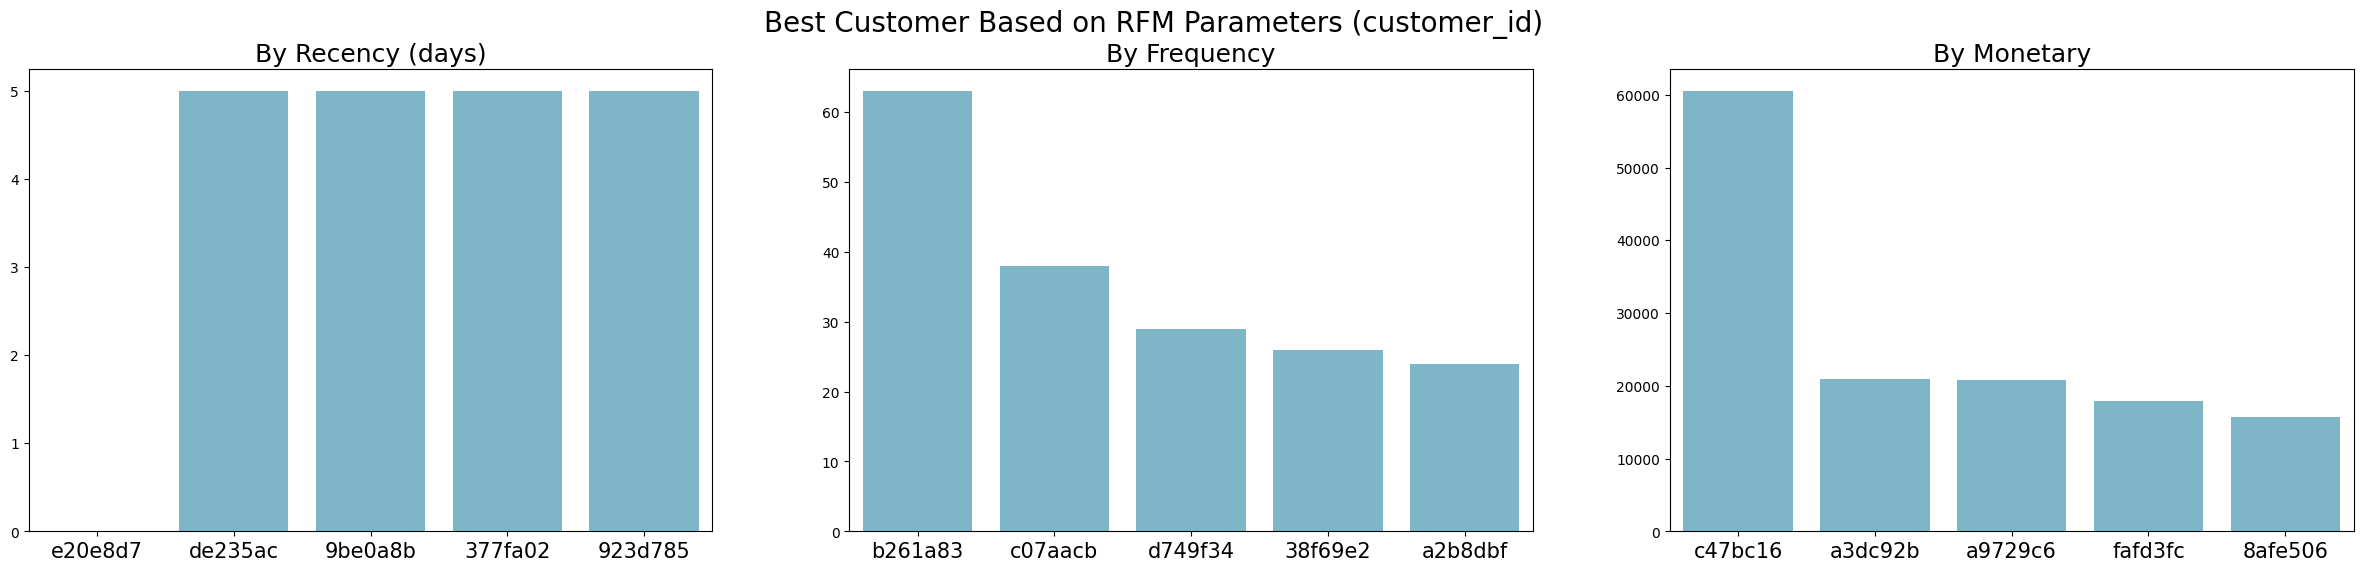

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="cust_id_short", data=df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="cust_id_short", data=df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="cust_id_short", data=df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Pertanyaan 7: bagaimana geoanalisis antara order, customer dan seller

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2